**작성자** : 김종원 , **작성일자** : 2022.02.11

# [실습] 단변량분석 종합실습 : 직원이직 분석

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 필요하다면, 검색을 통해 '직원이 회사를 떠나는 이유' 등을 찾아보는 것은 데이터 분석을 하는데 도움이 될 것입니다.
* 자, 이제 인사팀에서 제공한 데이터를 바탕으로 각각 개별 변수의 분포를 살펴보며, 비즈니스 인사이트를 최대한 도출해 봅시다.


---
## 문제 파악.
```
    최근 이직율의 증가로 직원들이 회사를 떠나는 케이스가 증가되고 있다. 

```
## 대책안
```
    데이터 분석을 통해 직원들이 회사를 떠나지 않도록 인사프로그램을 준비하려고 한다
```
---

**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


## 1.환경준비

* **라이브러리 임포트**

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

* 그래흐 한글 적용 가능하게 한글 폰트 설정

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

import platform
import seaborn as sns 
from matplotlib import font_manager, rc 

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

* **도메인 조사**

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

* **데이터 설명**

|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, 	|	범주	|Yes , No		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	BusinessTravel	|	출장빈도	|	범주	|Travel_Rarely, Travel_Frequently, Non-Travel		|
|	feature	|	Department	|	부서	|	범주	|Research & Development, Sales, Human Resources	|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	EmployeeNumber	|	사번	|	??	|		|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	RelationshipSatisfaction	|	관계만족도	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High|
|	feature	|	StockOptionLevel	|	스톡옵션레벨	|	범주	| 0 : 없음, 1~3 (클수록 스톡옵션을 많이 받음|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High

## 2. 데이터 로드

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
attrition = pd.read_csv(path)
attrition.drop(['Education','EducationField', 'EnvironmentSatisfaction', 'JobRole', 'JobInvolvement','NumCompaniesWorked','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']
               , axis = 1, inplace = True)
attrition.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance
0,No,33,Travel_Rarely,Research & Development,7.0,817,Male,3,Married,11691,No,11,4,0,14,4
1,No,35,Travel_Frequently,Research & Development,18.0,1412,Male,4,Single,9362,No,11,3,0,10,3
2,No,42,Travel_Rarely,Research & Development,6.0,1911,Male,1,Married,13348,No,13,2,1,18,4
3,No,46,Travel_Rarely,Sales,2.0,1204,Female,1,Married,17048,No,23,1,0,28,3
4,No,39,Travel_Frequently,Sales,NaN,1812,Male,4,Divorced,4127,No,18,4,1,7,3


## 3. 데이터 탐색(EDA & CDA)

### 1. 숫자형 변수 탐색 

### ① Age

In [4]:
var= 'Age'

1) 변수의 비즈니스 의미

> 직원 나이

2) 데이터 타입 : 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [5]:
attrition[var].isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [6]:
attrition[var].describe()

count    1250.000000
mean       36.931200
std         9.122162
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

5) 분포 확인(시각화)

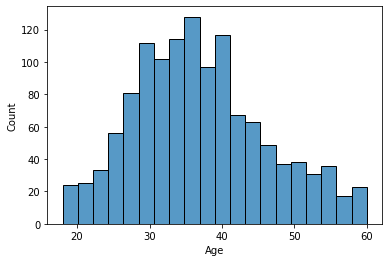

In [7]:
sns.histplot(attrition[var], bins = 20)
plt.show()

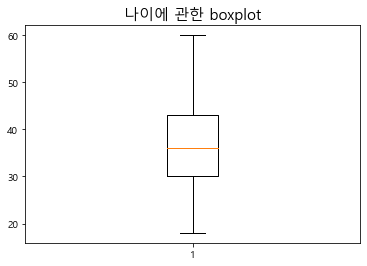

[30. 18.]
[43. 60.]


In [13]:
box = plt.boxplot(attrition[var])
plt.title("나이에 관한 boxplot",size = 15)
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 30대가 주축을 이루고 있음
* 18세 : 입사 가능 연령
* 60세 : 정년
* 40세 이후에 조금은 급격히 줄어드는 것으로 보아, 이때가 퇴사를 많이 하는 시점으로 보임. (보통 대기업에서 40대에 승진에서 누락되는 사람들, 새로운 분야로 진출하려는 사람들, 창업자들이 많아짐)

7) 추가 분석해 볼 사항이 있나요?

* 적절한(단순히 10살 단위가 아닌) 연령대로 분할하고, 연령대 별로 이직여부(이직율)을 검토해볼 필요가 있음
    * 직원들의 라이프사이클 파악 필요. 대졸, 입사 2~3년차, 5년차, 7년차 등 승진 및 이직을 고려하는 일반적인 시기 등 감안

### ② DistanceFromHome	

In [64]:
var = 'DistanceFromHome'

1) 변수의 비즈니스 의미

> 직장과 집 사이의 거리

2) 데이터 타입 : 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [65]:
print("Nan의 갯수 : ", attrition[var].isnull().sum(),"개")

Nan의 갯수 :  54 개


In [66]:
print("전체 데이터에서 Nan의 비중: ", attrition[var].isnull().sum() / attrition[var].shape[0]," 비중 ")

전체 데이터에서 Nan의 비중:  0.0432  비중 


> Nan값이 54개가 존재하고 전체 데이터에서 Nan의 비중이 낮기에 해당 값을 기초 통계량 및 시각화를 하여 채우거나 해당 행을 삭제하고자 한다.

4) 기초통계량(수치화)

In [67]:
attrition[var].describe()

count    1196.000000
mean        9.258361
std         8.166016
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

5) 분포 확인(시각화)

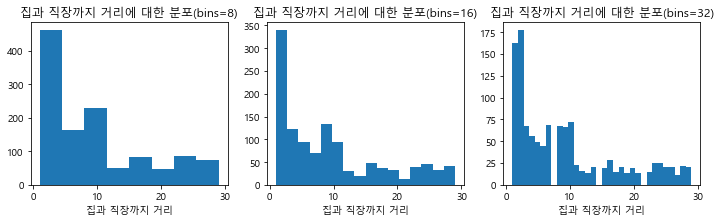

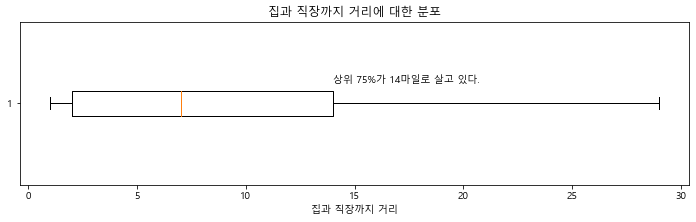

In [68]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.title("집과 직장까지 거리에 대한 분포(bins=8)")
plt.hist(attrition[var],bins=8)
plt.xlabel("집과 직장까지 거리")
plt.subplot(1,3,2)
plt.title("집과 직장까지 거리에 대한 분포(bins=16)")
plt.hist(attrition[var],bins=16)
plt.xlabel("집과 직장까지 거리")
plt.subplot(1,3,3)
plt.title("집과 직장까지 거리에 대한 분포(bins=32)")
plt.hist(attrition[var],bins=32)
plt.xlabel("집과 직장까지 거리")
plt.show()

plt.figure(figsize=(12,3))
plt.title("집과 직장까지 거리에 대한 분포")
q = plt.boxplot(attrition[attrition[var].notnull()][var],vert =False)
q75 = q["whiskers"][1].get_xdata()[0]
plt.text(q75,1.13, "상위 75%가 "+str(int(q75))+"마일로 살고 있다.")
plt.xlabel("집과 직장까지 거리")
plt.show()

In [69]:
# 1 마일에 1.6km
mile = 1.60934

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 회사와 집까지 거리가 약 가까운 사람들이 약 50% 이하가 7마일(11.2km) 거리 안에서 거주하고 있다.
* 상위 75퍼센트 이상분들은 14마일로 22.5 km 이상 거리에서 출퇴근을 하고 있는 상황이다.

7) 추가 분석해 볼 사항이 있나요?

* 상위 75퍼센트 이상분들이 14마일보다 먼 지역에 살고 있기에 거리로 인한 이직율이 거리가 짧은 지역에 사는 데이터와 비교하여 분석할 필요가 있어보인다.

### ③ MonthlyIncome

In [70]:
var= 'MonthlyIncome'

1) 변수의 비즈니스 의미

> 월급

2) 데이터 타입 : 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [71]:
attrition[var].isnull().sum()

0

> Nan값 존재하지 않음

4) 기초통계량(수치화)

In [72]:
attrition[var].describe()

count     1250.000000
mean      6525.548000
std       4676.979554
min       1009.000000
25%       2932.250000
50%       4988.000000
75%       8437.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

5) 분포 확인(시각화)

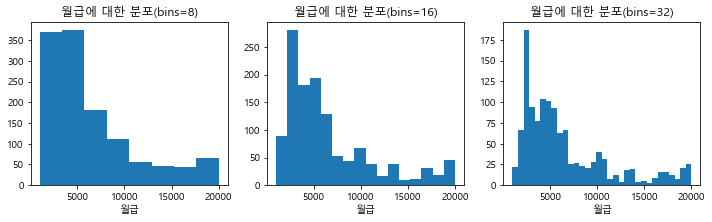

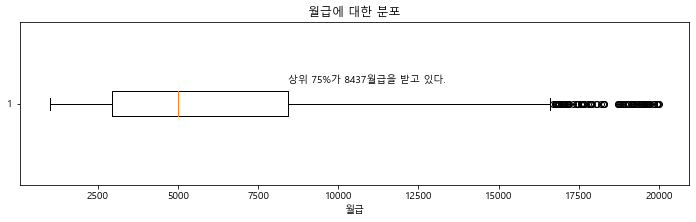

2932.25

In [73]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.title("월급에 대한 분포(bins=8)")
plt.hist(attrition[var],bins=8)
plt.xlabel("월급")
plt.subplot(1,3,2)
plt.title("월급에 대한 분포(bins=16)")
plt.hist(attrition[var],bins=16)
plt.xlabel("월급")
plt.subplot(1,3,3)
plt.title("월급에 대한 분포(bins=32)")
plt.hist(attrition[var],bins=32)
plt.xlabel("월급")
plt.show()

plt.figure(figsize=(12,3))
plt.title("월급에 대한 분포")
q = plt.boxplot(attrition[attrition[var].notnull()][var],vert =False)
q75 = q["whiskers"][1].get_xdata()[0]
plt.text(q75,1.13, "상위 75%가 "+str(int(q75))+"월급을 받고 있다.")
plt.xlabel("월급")
plt.show()

q["whiskers"][0].get_xdata()[0]

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 월급을 2932달라 이하로 받는 직원이 약 25%이하로 있는데 해당 분들은 신입으로 추청된다.
* 25~50 퍼센트까지 4988달러 이하로 받고 있으며 히스토그램을 보았을때 분포도 탄단하다. 즉, 팀장이든 연차가 있는 분들이 받는 월급을 판단된다.
* 8437달러 이상 받는 분들은 약 상위 25 퍼센트 이기에 고위급 간부로 판된된다.

7) 추가 분석해 볼 사항이 있나요?

* 과연 돈을 적게 받는 신입의 경우 이직이 잦을 것인지.
* 월급을 많은 받는 고위급 또는 중요한 분들은 이직을 할 것인지?
* 연차가 있는 집단에서는 조금더 데이터를 분할하여 월급을 어느 정도 받지만 이직을 하는지 원인을 파악하는 분석을 해보면 좋으것 같다.

### ④ PercentSalaryHike

In [76]:
var = 'PercentSalaryHike'

1) 변수의 비즈니스 의미

> 전년대비 급여인상율

2) 데이터 유형 : 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [78]:
print("Nan의 갯수 : ", attrition[var].isnull().sum(),"개")

Nan의 갯수 :  0 개


> Nan값 존재하지 않음

4) 기초통계량(수치화)

In [79]:
attrition[var].describe()

count    1250.000000
mean       15.216000
std         3.625556
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

5) 분포 확인(시각화)

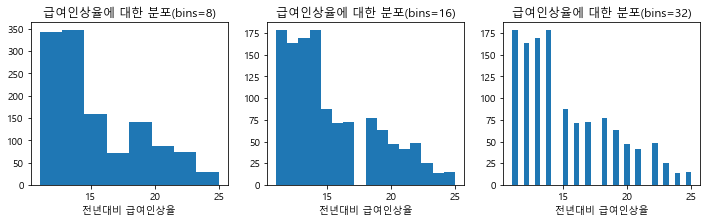

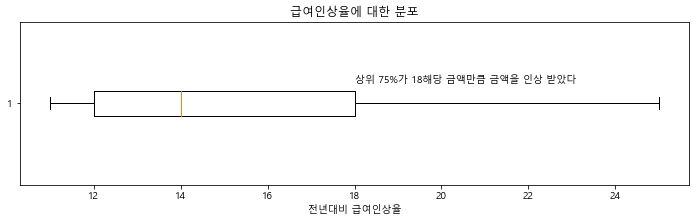

In [81]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.title("급여인상율에 대한 분포(bins=8)")
plt.hist(attrition[var],bins=8)
plt.xlabel("전년대비 급여인상율")
plt.subplot(1,3,2)
plt.title("급여인상율에 대한 분포(bins=16)")
plt.hist(attrition[var],bins=16)
plt.xlabel("전년대비 급여인상율")
plt.subplot(1,3,3)
plt.title("급여인상율에 대한 분포(bins=32)")
plt.hist(attrition[var],bins=32)
plt.xlabel("전년대비 급여인상율")
plt.show()

plt.figure(figsize=(12,3))
plt.title("급여인상율에 대한 분포")
q = plt.boxplot(attrition[attrition[var].notnull()][var],vert =False)
q75 = q["whiskers"][1].get_xdata()[0]
plt.text(q75,1.13, "상위 75%가 "+str(int(q75))+"해당 금액만큼 금액을 인상 받았다")
plt.xlabel("전년대비 급여인상율")
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 전년도 급여 인상이 평균 15 퍼센트이다.
* 급여 인상율이 최대 25퍼센트인것을 알 수 있고, 최소는 11퍼센트인 것을 알수 있다.

7) 추가 분석해 볼 사항이 있나요?

* 실질적으로 급여가 얼마나 인상을 했는지 수치적으로 보면은 이 직원이 어느 정도 인상되어 월급을 받는지 알 수 있을 것으로 판단된다.
    * 이전에 비해 얼마나 돈이 인상됐는지 시각화하고 그룹을 묶어서 비교를 하면 이직율에서 어떤 특징이 있을 것으로 추정된다.

### ⑤ TotalWorkingYears

In [82]:
var = 'TotalWorkingYears'

1) 변수의 비즈니스 의미

> 총 경력 연수

2) 데이터 유형 :  숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [84]:
print("Nan의 갯수 : ", attrition[var].isnull().sum(),"개")

Nan의 갯수 :  0 개


> Nan값 존재하지 않음

4) 기초통계량(수치화)

In [85]:
attrition[var].describe()

count    1250.00000
mean       11.33920
std         7.79687
min         0.00000
25%         6.00000
50%        10.00000
75%        15.00000
max        40.00000
Name: TotalWorkingYears, dtype: float64

5) 분포 확인(시각화)

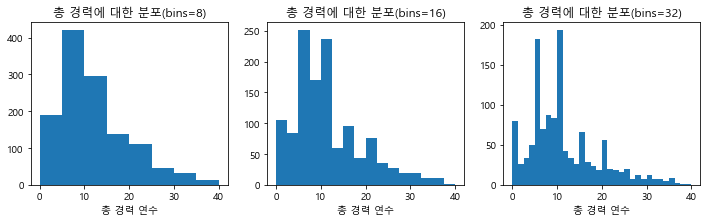

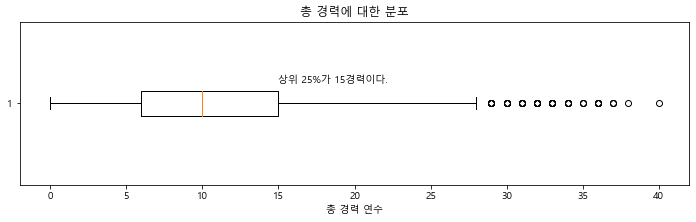

array([15., 28.])

In [89]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.title("총 경력에 대한 분포(bins=8)")
plt.hist(attrition[var],bins=8)
plt.xlabel("총 경력 연수")
plt.subplot(1,3,2)
plt.title("총 경력에 대한 분포(bins=16)")
plt.hist(attrition[var],bins=16)
plt.xlabel("총 경력 연수")
plt.subplot(1,3,3)
plt.title("총 경력에 대한 분포(bins=32)")
plt.hist(attrition[var],bins=32)
plt.xlabel("총 경력 연수")
plt.show()

plt.figure(figsize=(12,3))
plt.title("총 경력에 대한 분포")
q = plt.boxplot(attrition[attrition[var].notnull()][var],vert =False)
q75 = q["whiskers"][1].get_xdata()[0]
plt.text(q75,1.13, "상위 25%가 "+str(int(q75))+"경력이다.")
plt.xlabel("총 경력 연수")
plt.show()

q["whiskers"][1].get_xdata()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 경력이 대부분 50% 정도 6년에서 15년의 경력을 가지고 있다.
* 28년부터 40년까지 해당 직장에 근무한 직원이 있는다. 해당 직원은 왜 오랫동안 다녔는지 이유를 파악해 이직을 하는 사람들이 이직을 못하도록 오랫동안 다닌 직장 선배의 데이터를 참고하는 건 어떨지 고민된다.

7) 추가 분석해 볼 사항이 있나요?

* 경력별 이직율을 분석해보고자 한다
* 월급을 분할하고 경력별로 월급을 분할한 것에 대해 이직율에 대한 비중을 분석을 해보고자 한다.

## 범주형 변수

### ① Attrition

In [90]:
var = 'Attrition'

1) 변수의 비즈니스 의미

> 직원 이직여부

2) 숫자, 범주?

In [91]:
attrition[var].unique()

array(['No', 'Yes'], dtype=object)

> * 범주형 데이터
* 범주 종류 Yes , No

3) NaN 존재 유무 및 조치방안

In [92]:
attrition[var].isna().sum()

0

> * NA 없음
* 당연히 Target이기에 NA가 있으면 안됨!


4) 가변수화 필요 여부

> * Yes , No로 되어 있음. 
* 1, 0으로 변환해야 함.

In [93]:
# 변환 코드
# attrtion['Attrition'] = np.where(attrtion['Attrition'] == 'Yes', 1, 0)

5) 기초통계량(수치화)

In [94]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/ len(attrition[var]))

No     1050
Yes     200
Name: Attrition, dtype: int64
No     0.84
Yes    0.16
Name: Attrition, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


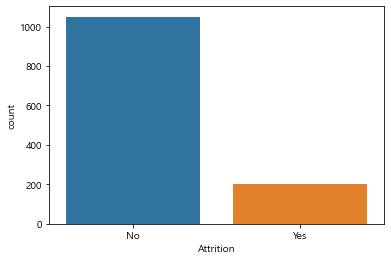

In [95]:
sns.countplot(attrition[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체 1196명 직원
* 이직자 : 195명, 이직율 : 0.163
* 이직율이 16.3% 는 적정한가? 동종 업계 수준은? 전년대비?

8) 추가 분석해 볼 사항이 있나요?

> * Attribute가 Target 이므로, feature들과 Target 과의 관계를 살펴보게 될 것.
* 그러므로 추가 분석하고자 하는 사항은 feature들을 살펴볼 때 도출하게 될 것이라 생각됨.

### ② OverTime	

In [96]:
var = 'OverTime'

1) 변수의 비즈니스 의미

> 야근여부

2) 데이터 유형 : 숫자, 범주?

In [97]:
attrition[var].unique()

array(['No', 'Yes'], dtype=object)

> 범주형 ('No', 'Yes')

3) NaN 존재 유무 및 조치방안

In [99]:
attrition[var].isna().sum()

0

> * NA 없음

4) 가변수화 필요 여부

> * Yes , No로 되어 있음. 
* 1, 0으로 변환해야 함.

5) 기초통계량(수치화)

In [100]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/ len(attrition[var]))

No     896
Yes    354
Name: OverTime, dtype: int64
No     0.7168
Yes    0.2832
Name: OverTime, dtype: float64


6) 분포 확인(시각화)

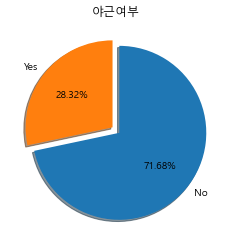

In [106]:
cnt = attrition[var].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False, 
        explode = [0.05, 0.05], shadow=True)
plt.title("야근여부")
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 야근을 안하는 직원이 약 71퍼센트이고 야근을 하는 분들이 약 28퍼센트인것을 알수 있다.
* 또한 데이터가 극한 불균형 데이터라고 볼수가 없다.

8) 추가 분석해 볼 사항이 있나요?

* 야근을 안하는 직원들이 이직을 많이 하는지 또는 야근을 하는 직원이 이직을 많이하는지 groupby를 통해 살펴볼 가치가 있다.

### ③ MaritalStatus

In [107]:
var= 'MaritalStatus'

1) 변수의 비즈니스 의미

> 결혼상태

2) 숫자, 범주?

In [108]:
attrition[var].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

> 범주형('Married', 'Single', 'Divorced')

3) NaN 존재 유무 및 조치방안

In [109]:
attrition[var].isna().sum()

0

4) 가변수화 필요 여부

> * 'Married', 'Single', 'Divorced'로 되어 있기에 가변수화 필요.

5) 기초통계량(수치화)

In [112]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/ len(attrition[var]))

Married     570
Single      404
Divorced    276
Name: MaritalStatus, dtype: int64
Married     0.4560
Single      0.3232
Divorced    0.2208
Name: MaritalStatus, dtype: float64


6) 분포 확인(시각화)

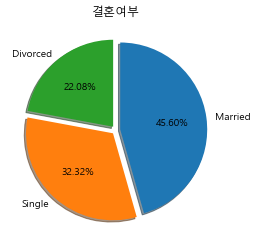

In [116]:
cnt = attrition[var].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False, 
        explode = [0.05, 0.05, 0.05], shadow=True)
plt.title("결혼여부")
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 약 46퍼센트가 결혼을 한 상태이다.
* 약 32퍼센트가 결혼을 한 상태이고, 약 22퍼센트가 이혼한 상태이다.

* 결혼을 했다면 가장이라는 무게로.. 이직율이 낮지 않을까? 등 가설을 세울만한게 꽤 될 것 같다.

8) 추가 분석해 볼 사항이 있나요?

* 각 집단마다의 이직의 비율을 분석해보고자 하며, 남성과 여성이라는 성별과 묶어서 분석하여 남여 결혼에 따른 이직 비율을 분석해보고자 한다.

### ④ JobSatisfaction

In [119]:
var = 'JobSatisfaction'

1) 변수의 비즈니스 의미

> 직무 만족도

2) 데이터 유형 : 숫자, 범주?

In [120]:
attrition[var].unique()

array([3, 4, 1, 2], dtype=int64)

> 범주형 (1,2,3,4)

3) NaN 존재 유무 및 조치방안

In [123]:
attrition[var].isna().sum()

0

> * NA 없음

4) 가변수화 필요 여부

> * 1,2,3,4로 가변수화 필요함 

5) 기초통계량(수치화)

In [124]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/ len(attrition[var]))

4    397
3    368
1    250
2    235
Name: JobSatisfaction, dtype: int64
4    0.3176
3    0.2944
1    0.2000
2    0.1880
Name: JobSatisfaction, dtype: float64


6) 분포 확인(시각화)

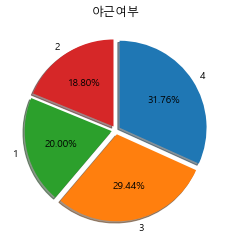

In [126]:
cnt = attrition[var].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False, 
        explode = [0.05, 0.05,0.05, 0.05], shadow=True)
plt.title("야근여부")
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 회사내 직원 만족도는 4가 제일 높은 만족도를 나타내며 1은 제일 낮은 만족도를 나타낸다.
    * 이런 상황에서 그래프를 보면 만족도 4가 약 31퍼센트로 제일 많이 차지하며, 만족도 3이 약 29퍼센트를 차지한다.
        * 여기서 만족도 4와 3은 높은 만족도를 나타내며 약 60퍼센트가 회사에 만족하고 있는 것을 알 수 있다.
        * 하지만 약 40% 정도 회사에 어느정도 만족을 못한다고 볼수 있기에 위 비율은 높다고 할 수 없다.
        * 만족도 1에 대한 퍼센트가 약 20퍼센트로 3위를 차지하고 있다는게 문제점이 될 수 있다.


8) 추가 분석해 볼 사항이 있나요?

* 그래서 추가로 분석을 해볼 사항으로는 직원 만족도별 이직율에 대해서 비교하고, 직원이 불만족에 대한 원인을 데이터를 통해 분석이 된다면 좋을 것으로 판단된다.

---